<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/KNNandSVMandRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
# Load the dataset
iris = load_iris()

# Access features and labels
X = iris.data      # Features
y = iris.target    # Labels

# Optional: feature names and target names
feature_names = iris.feature_names
target_names = iris.target_names


In [10]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# **KNN**

In [13]:
# Step 3: Feature Scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Step 4: Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can change 'k' here
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Step 5: Make predictions
y_pred = knn.predict(X_test)

In [16]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [19]:
# Convert to DataFrame for visualization
test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['Actual'] = [target_names[i] for i in y_test]
test_df['Predicted'] = [target_names[i] for i in y_pred]

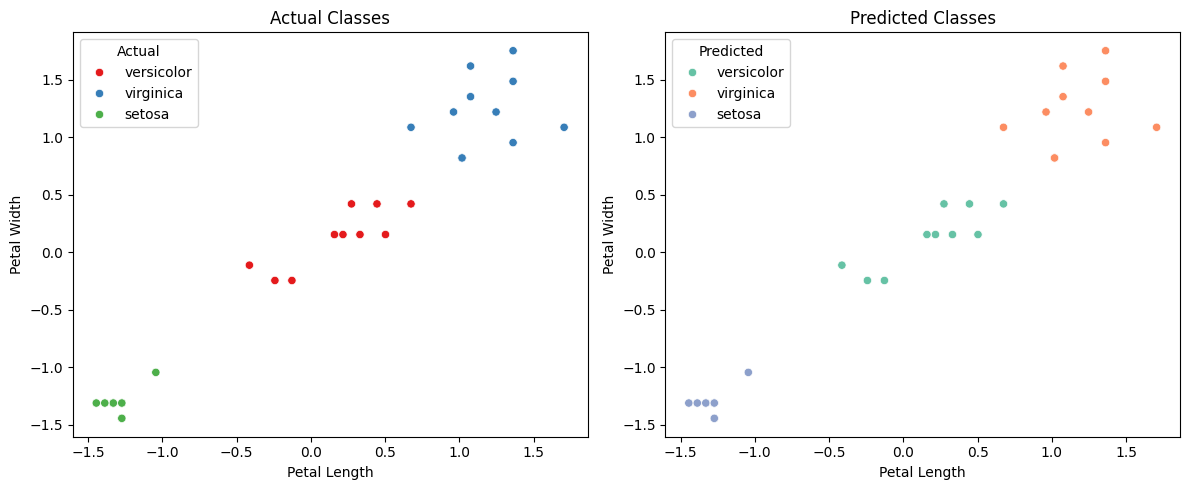

In [24]:
# Scatter plot: Petal length vs Petal width
plt.figure(figsize=(12, 5))

# Actual
plt.subplot(1, 2, 1)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Actual', palette='Set1')
plt.title("Actual Classes")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
# Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Predicted', palette='Set2')
plt.title("Predicted Classes")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.tight_layout()
plt.show()

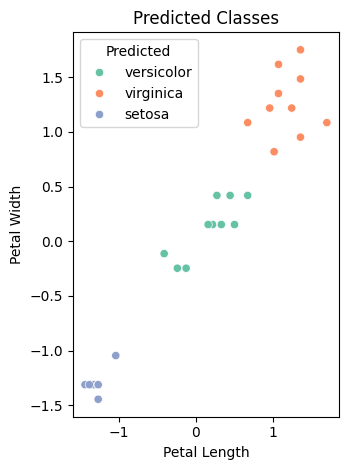

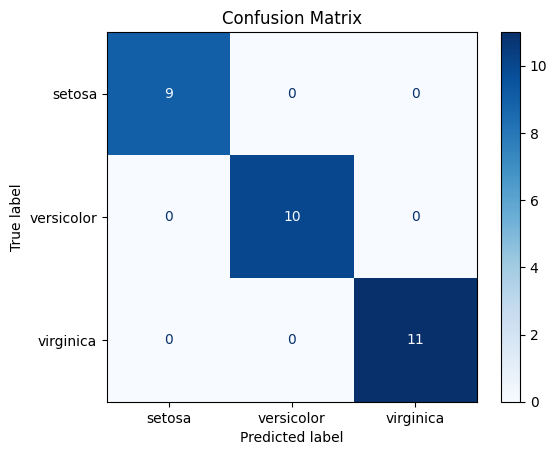

In [23]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# **Support Vector Machine(SVM)**

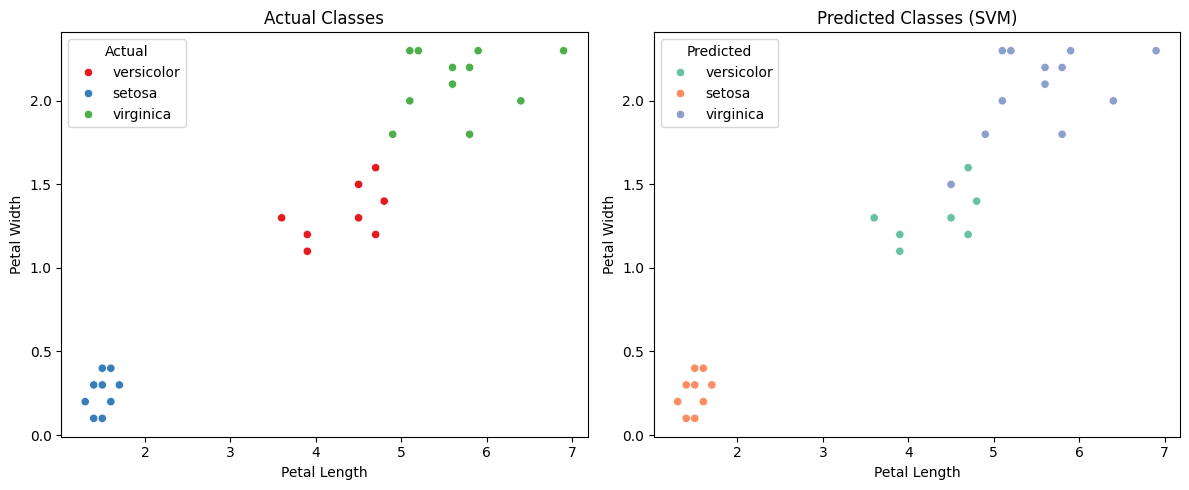

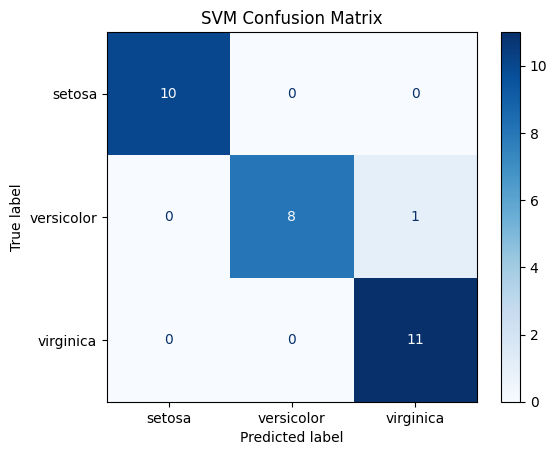

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm.predict(X_test_scaled)

# Create DataFrame for visualization
test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['Actual'] = [target_names[i] for i in y_test]
test_df['Predicted'] = [target_names[i] for i in y_pred]

# Scatter plot: Petal length vs Petal width
plt.figure(figsize=(12, 5))

# Actual
plt.subplot(1, 2, 1)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Actual', palette='Set1')
plt.title("Actual Classes")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Predicted
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Predicted', palette='Set2')
plt.title("Predicted Classes (SVM)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


# **Random Forest**

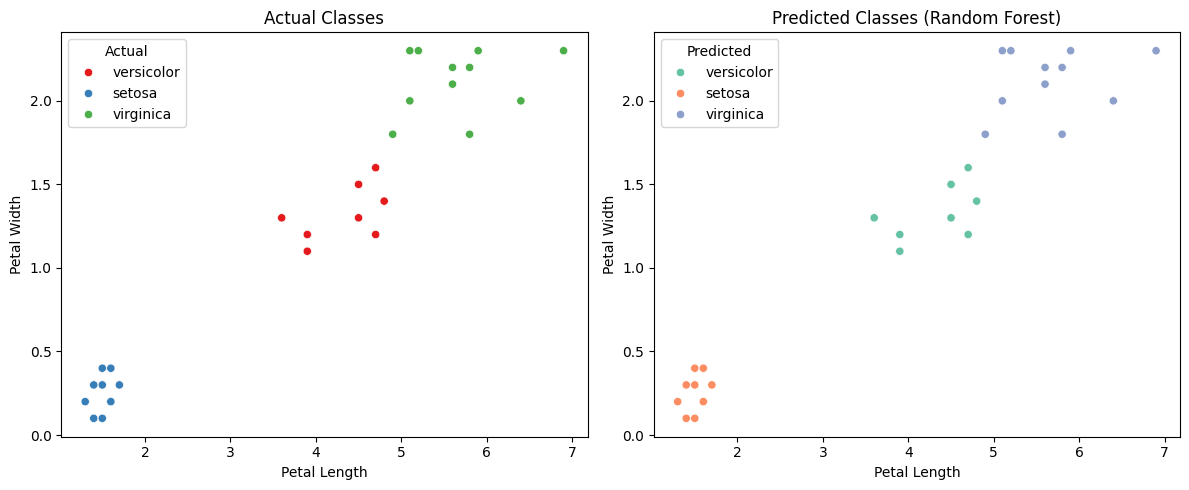

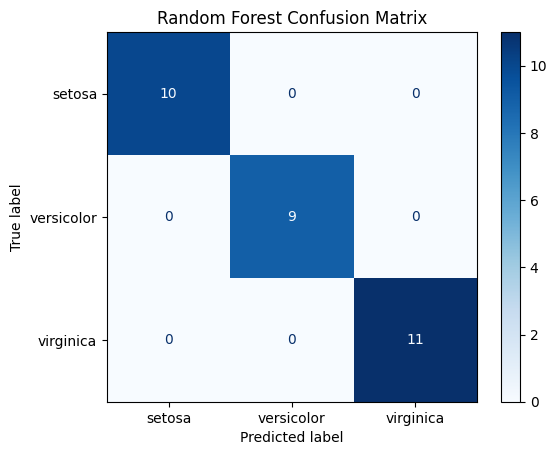

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (not required for RF, but we keep for consistency in plots)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred = rf.predict(X_test_scaled)

# Create DataFrame for visualization
test_df = pd.DataFrame(X_test, columns=feature_names)
test_df['Actual'] = [target_names[i] for i in y_test]
test_df['Predicted'] = [target_names[i] for i in y_pred]

# Scatter plots: Actual vs Predicted
plt.figure(figsize=(12, 5))

# Actual labels
plt.subplot(1, 2, 1)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Actual', palette='Set1')
plt.title("Actual Classes")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

# Predicted labels
plt.subplot(1, 2, 2)
sns.scatterplot(data=test_df, x='petal length (cm)', y='petal width (cm)', hue='Predicted', palette='Set2')
plt.title("Predicted Classes (Random Forest)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

plt.tight_layout()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()
